In [2]:
library(Seurat)
library(patchwork)
library(tidyverse)
library(ggpubr)
source("/shareb/zliu/analysis/hires_gastrulation/CHARMtools/Rlibs/plotFun.R")

source("/shareb/zliu/analysis/hires_gastrulation/CHARMtools/Rlibs/cellcycle_ana.R")
library(foreach)
library(doParallel)

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

circlize version 0.4.13
CRAN page: https://c

In [3]:
hires <- readRDS("../../hires_mouse_emb_dev.new.rds")
celltypeColors = c(
"mitosis"="#bebebe","blood"="#ff9400",
"ExE endoderm"="#fec44f", "ExE ectoderm"="#cab2d6", 
"epiblast and PS"="#addd8e",
#neural
"neural ectoderm"="#AECBE6","NMP"="#96B9DB","neural tube"="#7EA8D0","notochord"="#6696C6","radial glias"="#4F85BB","oligodendrocytes and progenitors"="#3773B1","early neurons"="#1F62A6","schwann cell precursors"="#08519C",
#mesodermal
"early mesoderm"="#FC9272","ExE mesoderm"="#EF7F64","early mesenchyme"="#E36C57","intermediate mesoderm"="#D6594A", "myocytes"="#CA473C","mix late mesenchyme"="#BD342F",
"endoderm"="#fe9929","epithelial cells"="#fa9fb5"
)
cellcyclecolors = c("G0"="#762a83","G1"="#c2a5cf","Early-S"="#99d8c9","Mid-S"="#66c2a4","Late-S"="#41ae76","G2"="#238b45","M"="#ea6e34")

In [4]:
celltype_group_colors <- celltypeColors
names(celltype_group_colors) <- as.character(seq(length(celltypeColors)))

`summarise()` has grouped output by 'celltype', 'cluster', 'sub_k_cluster'. You can override using the `.groups` argument.
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


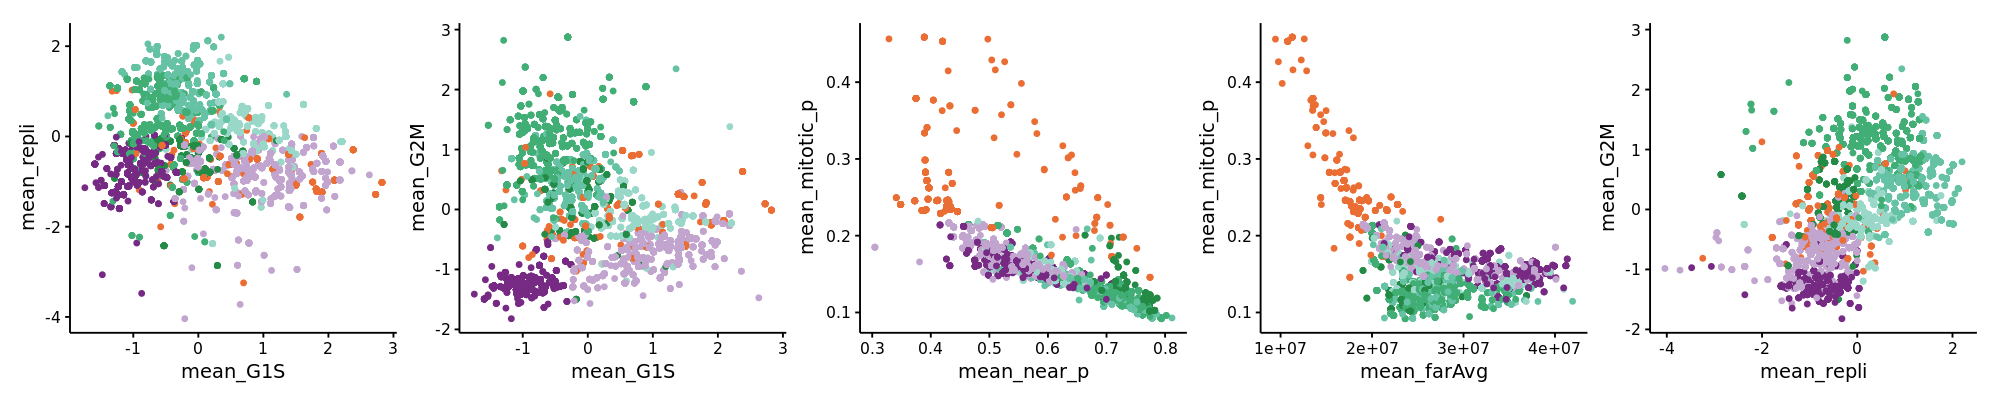

In [16]:
data <- hires[[]] %>%  group_by(celltype,cluster,sub_k_cluster) %>% 
    summarise(count = n(),mean_G1S = mean(G1S.Score),mean_G2M = mean(G2M.Score),mean_repli = mean(repli_score),mean_near_p = mean(near_p),mean_mitotic_p = mean(mitotic_p),mean_farAvg = mean(farAvg),cellcycle_threshold=cellcycle_threshold)

a <- data %>%  ggplot() + geom_point(aes(x=mean_G1S,y=mean_repli,color=cellcycle_threshold),size = 0.5) + scale_color_manual(values=cellcyclecolors) + theme_Publication() + NoLegend()
b <- data %>% ggplot() + geom_point(aes(x=mean_G1S,y=mean_G2M,color=cellcycle_threshold),size = 0.5) + scale_color_manual(values=cellcyclecolors)+ theme_Publication() +  NoLegend()
c <- data %>% ggplot() + geom_point(aes(x=mean_near_p,y=mean_mitotic_p,color=cellcycle_threshold),size = 0.5)+ scale_color_manual(values=cellcyclecolors)+ theme_Publication() +  NoLegend()
d <- data %>% ggplot() + geom_point(aes(x=mean_farAvg,y=mean_mitotic_p,color=cellcycle_threshold),size = 0.5)+ scale_color_manual(values=cellcyclecolors)+ theme_Publication() + NoLegend()
e <- data %>% ggplot() + geom_point(aes(x=mean_repli,y=mean_G2M,color=cellcycle_threshold),size = 0.5)+ scale_color_manual(values=cellcyclecolors)+ theme_Publication() +  NoLegend()
options(repr.plot.width=10,repr.plot.height=2,repr.plot.res=200)
(a| b | c |  d | e)

In [18]:
(a| b | c |  d | e) %>% ggsave(filename = "cellcycle_annotation_scatter.pdf",width =7.5, height = 1.5)

# Figure2

In [7]:
options(repr.plot.width=4, repr.plot.height=4,repr.plot.res=200)

In [8]:
hires@meta.data <- tibble(celltype = names(celltypeColors)) %>% mutate(group_id = row_number()) %>%
    left_join(hires[[]])%>% mutate(temp = cellname) %>% column_to_rownames("temp")

Joining, by = "celltype"


In [9]:
hires@meta.data <- hires@meta.data %>% arrange(cellname)

In [ ]:
p <- DimPlot(hires,label=T,label.size = 2,repel=T,pt.size = 0.05,reduction = "umap",group.by = "group_id",cols=celltype_group_colors) + theme_Publication()+ ggtitle("") #+ NoLegend()
p <- p + theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + xlab("RNA UMAP 1") + ylab("RNA UMAP 2") + theme(legend.position = "right")
p
p %>% ggsave(filename = "umap_main_RNA.pdf",height = 2, width =3.5,dpi=300,units ="in")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


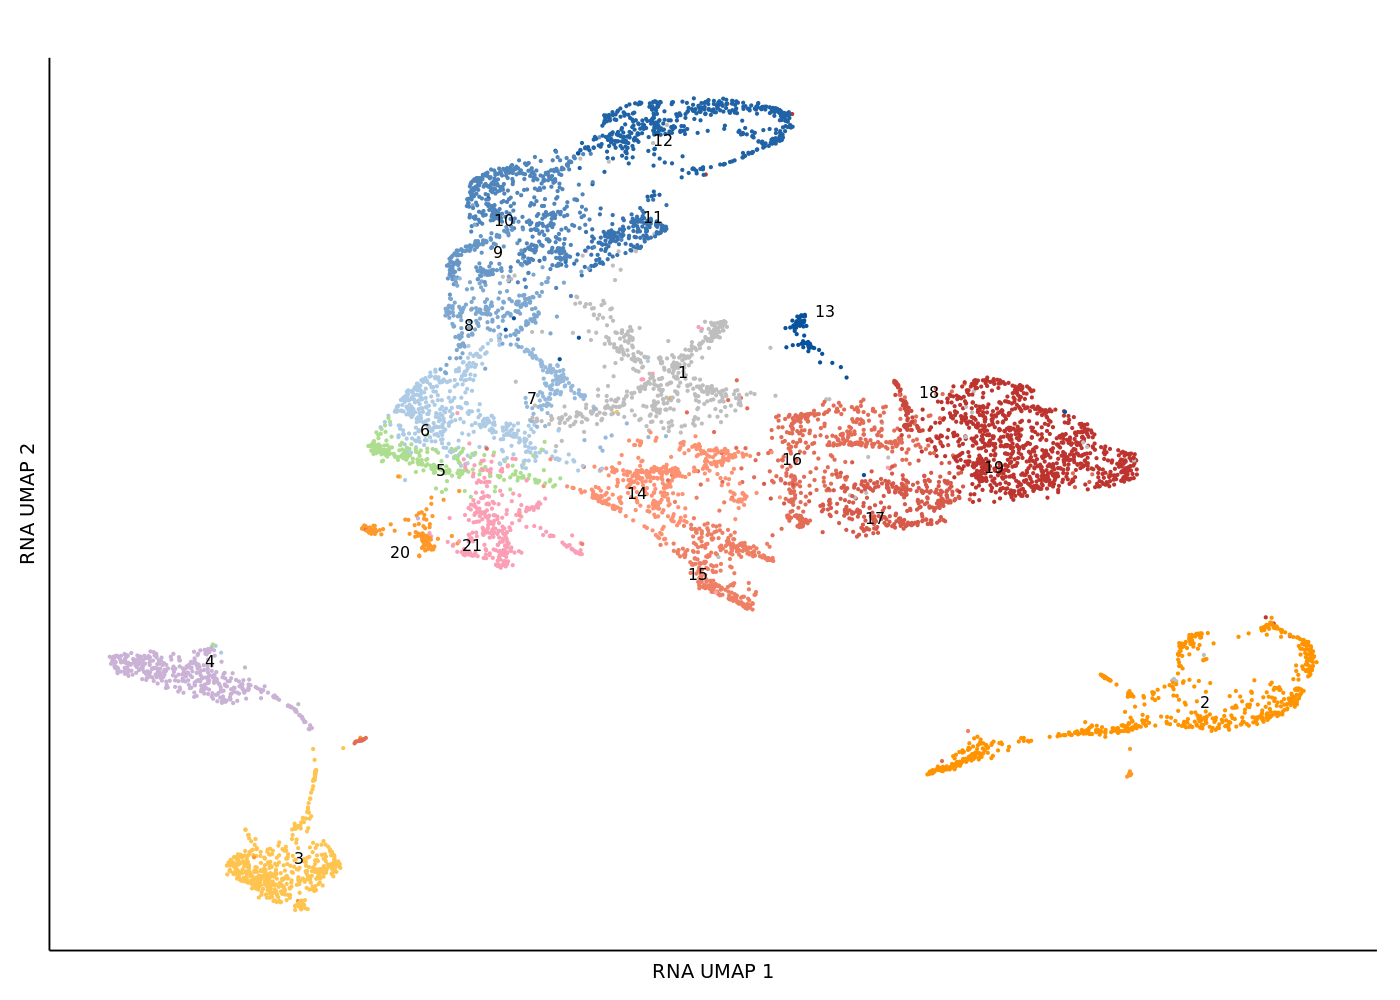

In [82]:
p <- DimPlot(hires,label=T,label.size = 2,repel=T,pt.size = 0.05,reduction = "umap",group.by = "group_id",cols=celltype_group_colors) + theme_Publication()+ ggtitle("") #+ NoLegend()
p <- p + theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + xlab("RNA UMAP 1") + ylab("RNA UMAP 2") + theme(legend.position = "right") + NoLegend()
p
p %>% ggsave(filename = "umap_main_RNA_nolegend.pdf",height = 2, width =2,dpi=300,units ="in")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


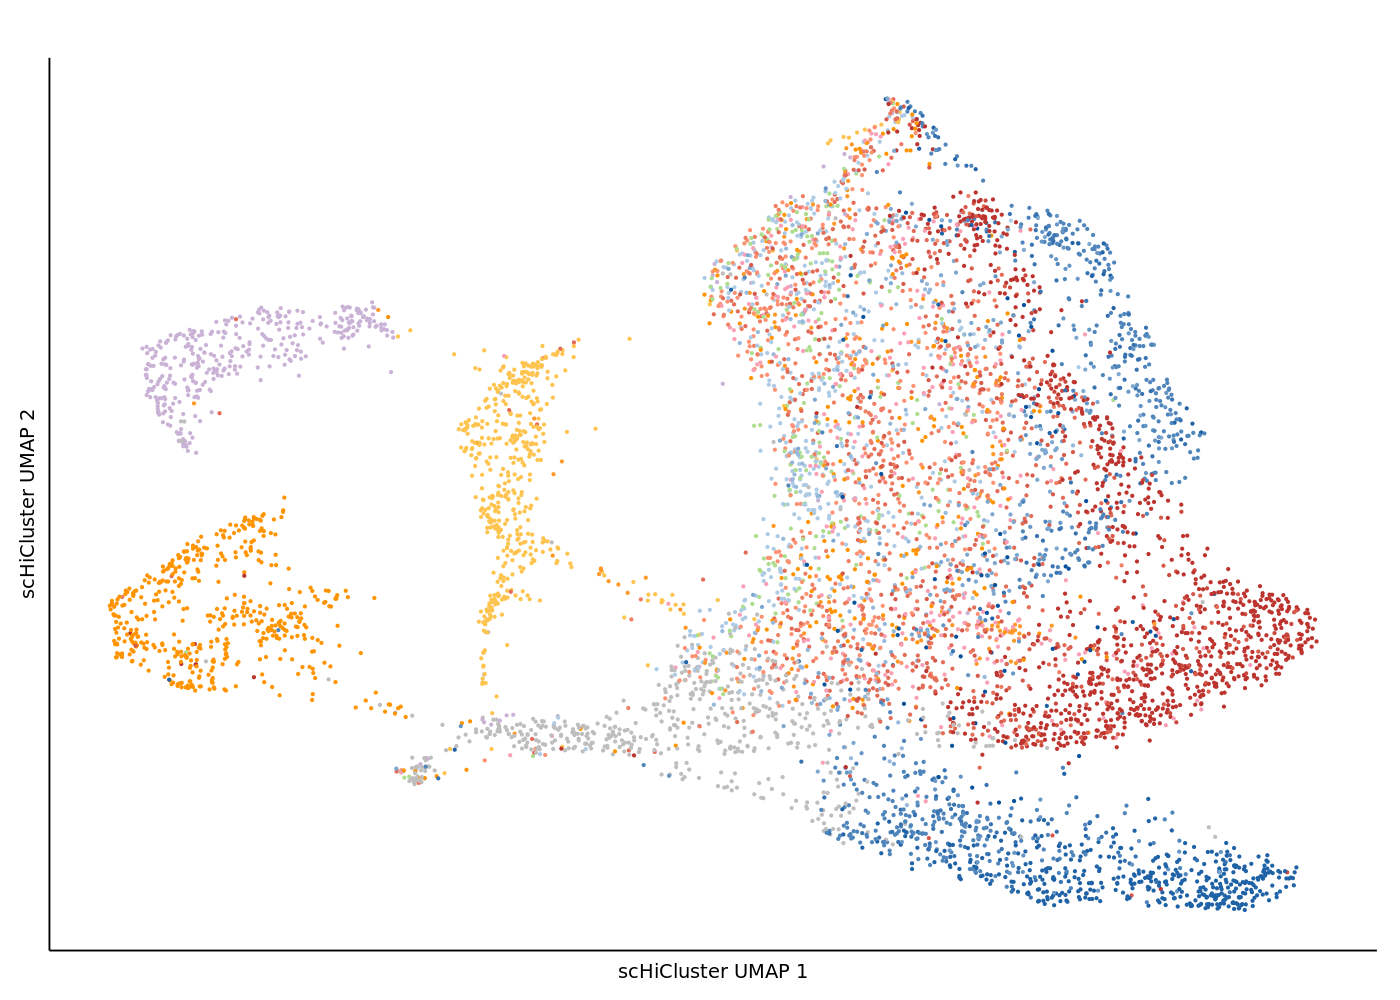

In [83]:
p <- DimPlot(hires,label=F,reduction = "schiclusterumap",group.by = "celltype",cols=celltypeColors,pt.size=0.05) + theme_Publication() + ggtitle("") + NoLegend()
p <- p + theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + xlab("scHiCluster UMAP 1") + ylab("scHiCluster UMAP 2")
p
p %>% ggsave(filename = "umap_main_HiC_nolegend.pdf",height = 2, width =2,dpi=300,units ="in")

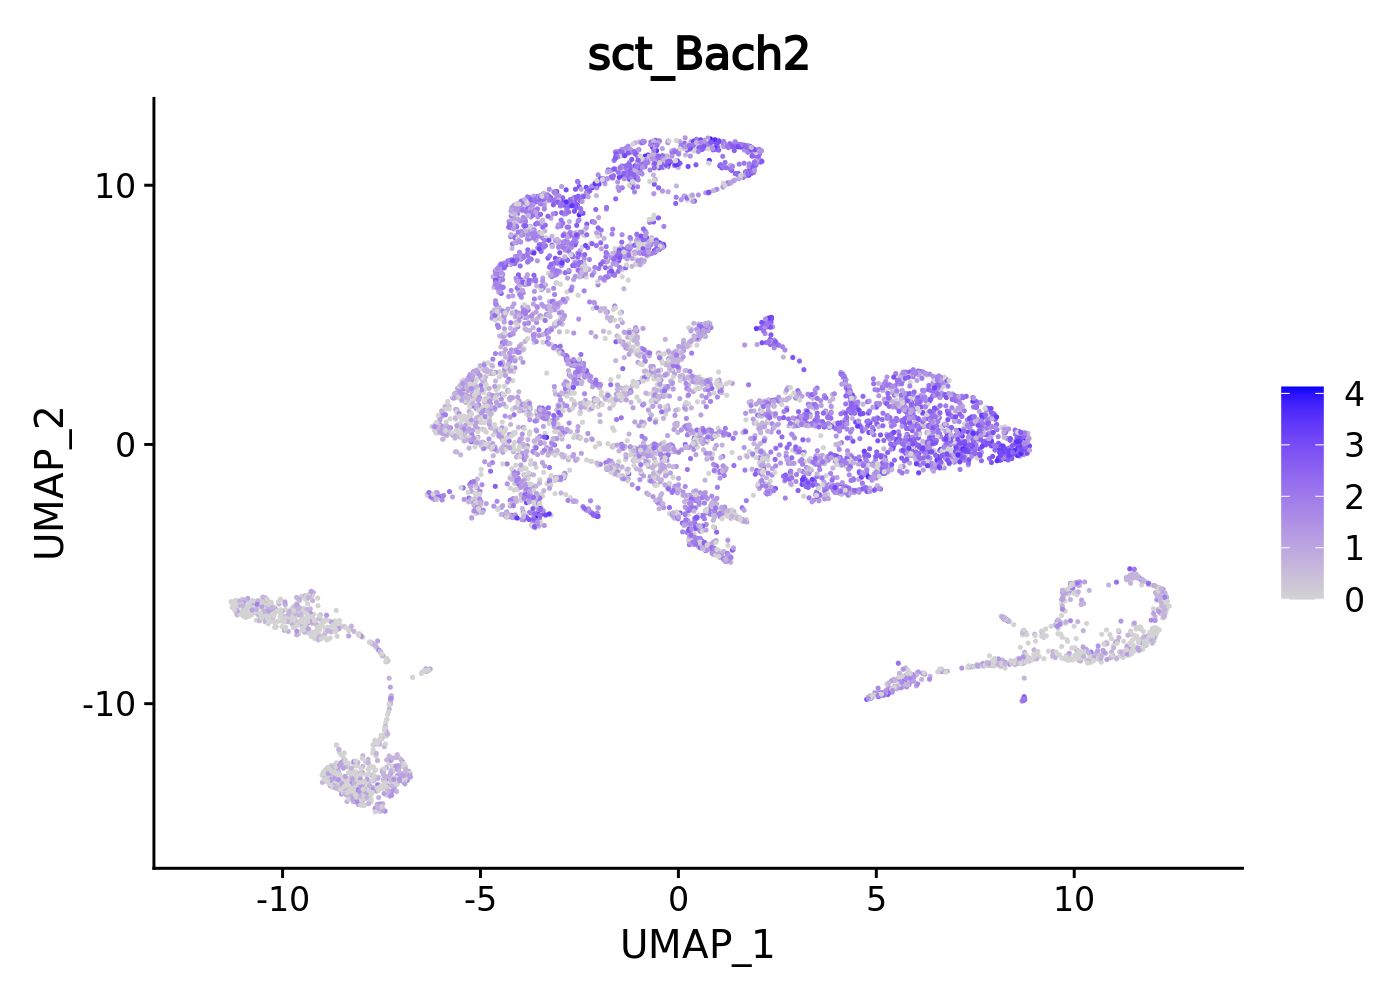

In [76]:
FeaturePlot(hires,"sct_Bach2",reduction = "umap")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


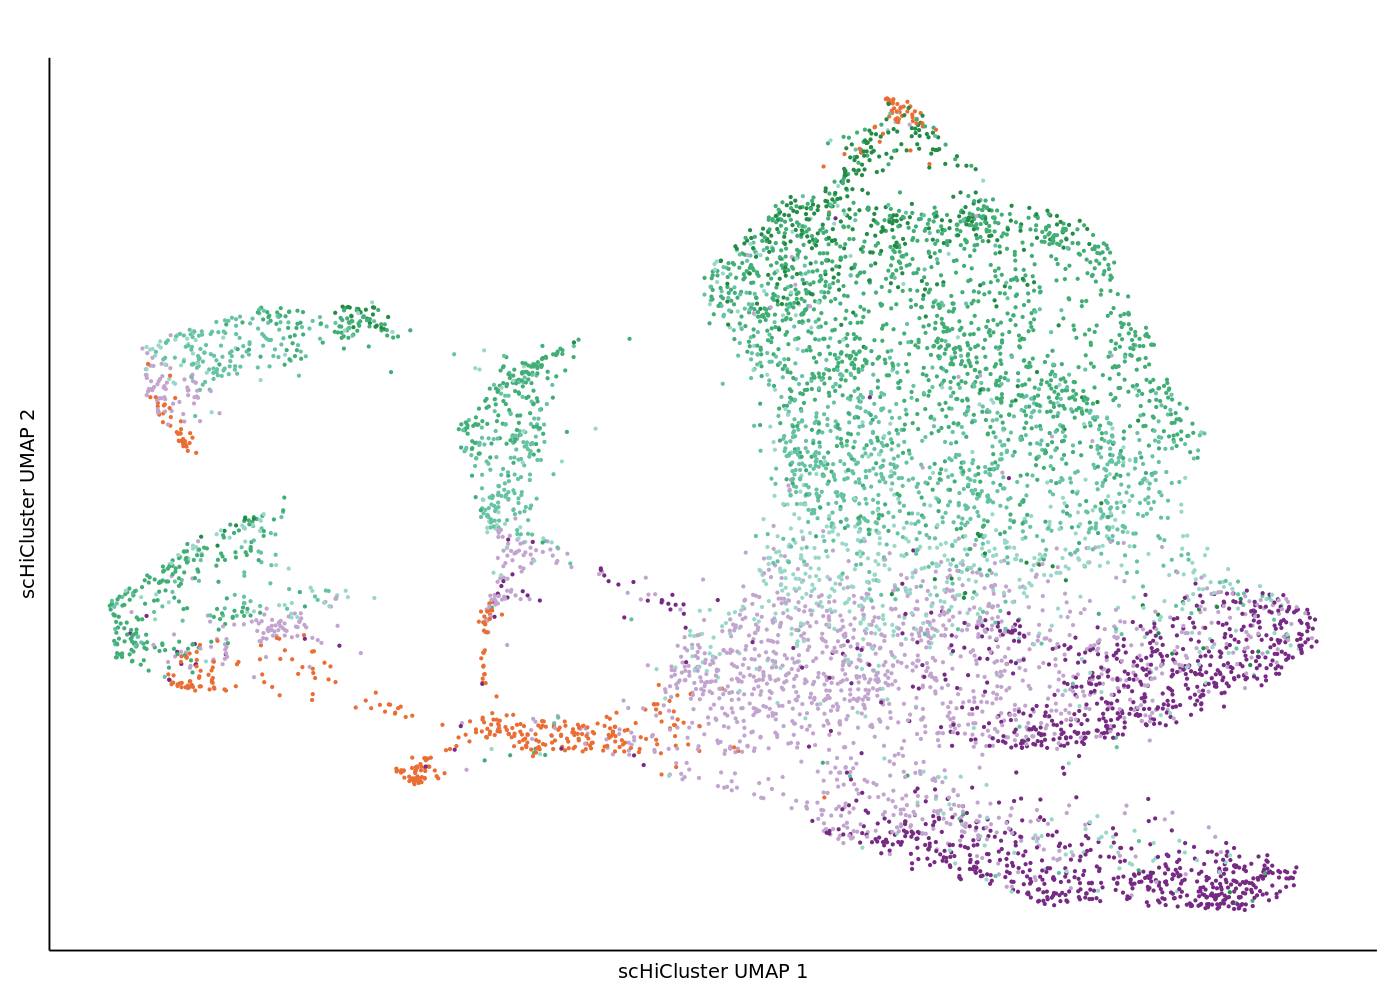

In [85]:
p <- DimPlot(hires,label=F,repel = F,reduction = "schiclusterumap",group.by = "cellcycle_threshold",cols=cellcyclecolors,pt.size=0.05) + theme_Publication() + 
    ggtitle("")  + theme(legend.position = "right",legend.direction = "vertical")#+ NoLegend()
p <- p + theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + xlab("scHiCluster UMAP 1") + ylab("scHiCluster UMAP 2")+
           theme(legend.position = "bottom",legend.direction = "horizontal") + NoLegend()
p

p %>% ggsave(filename = "umap_main_cellcycleHiC.pdf",height = 2, width =2,dpi=300,units ="in")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


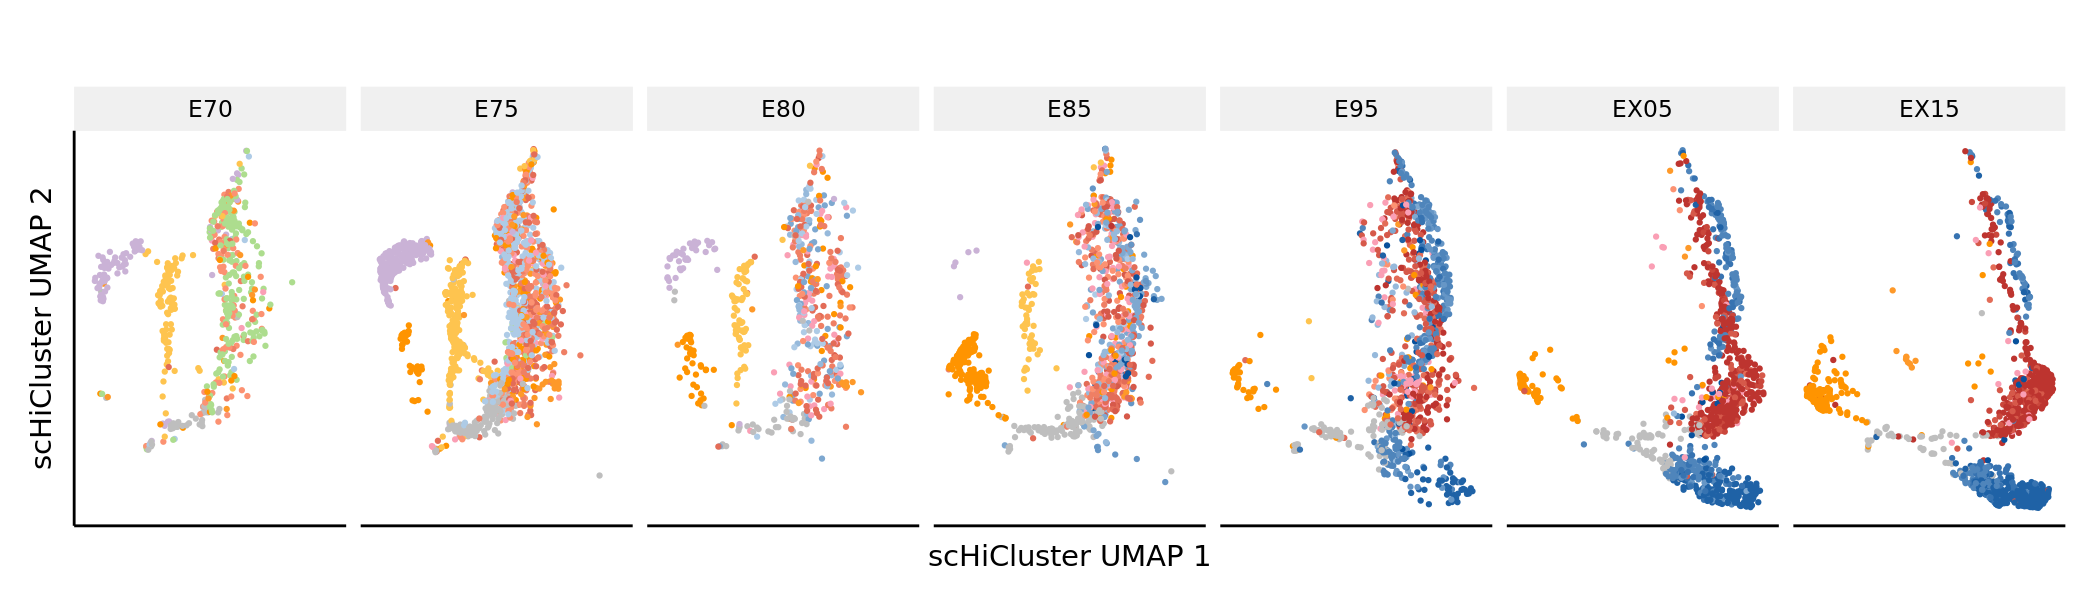

In [16]:
options(repr.plot.width=7, repr.plot.height=2,repr.plot.res=300)
p <- DimPlot(hires,label=F,repel = F,reduction = "schiclusterumap",group.by = "celltype",cols=celltypeColors,pt.size=0.05,split.by="stage") + theme_Publication() + 
    ggtitle("")  + theme(legend.position = "right",legend.direction = "vertical") + NoLegend() + 
      scale_x_continuous(breaks = c(-6,-1,4))

p <- p + theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + xlab("scHiCluster UMAP 1") + ylab("scHiCluster UMAP 2")
p
p %>% ggsave(filename = "umap_main_stageHiC.pdf",height = 2, width =8,dpi=300,units ="in")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


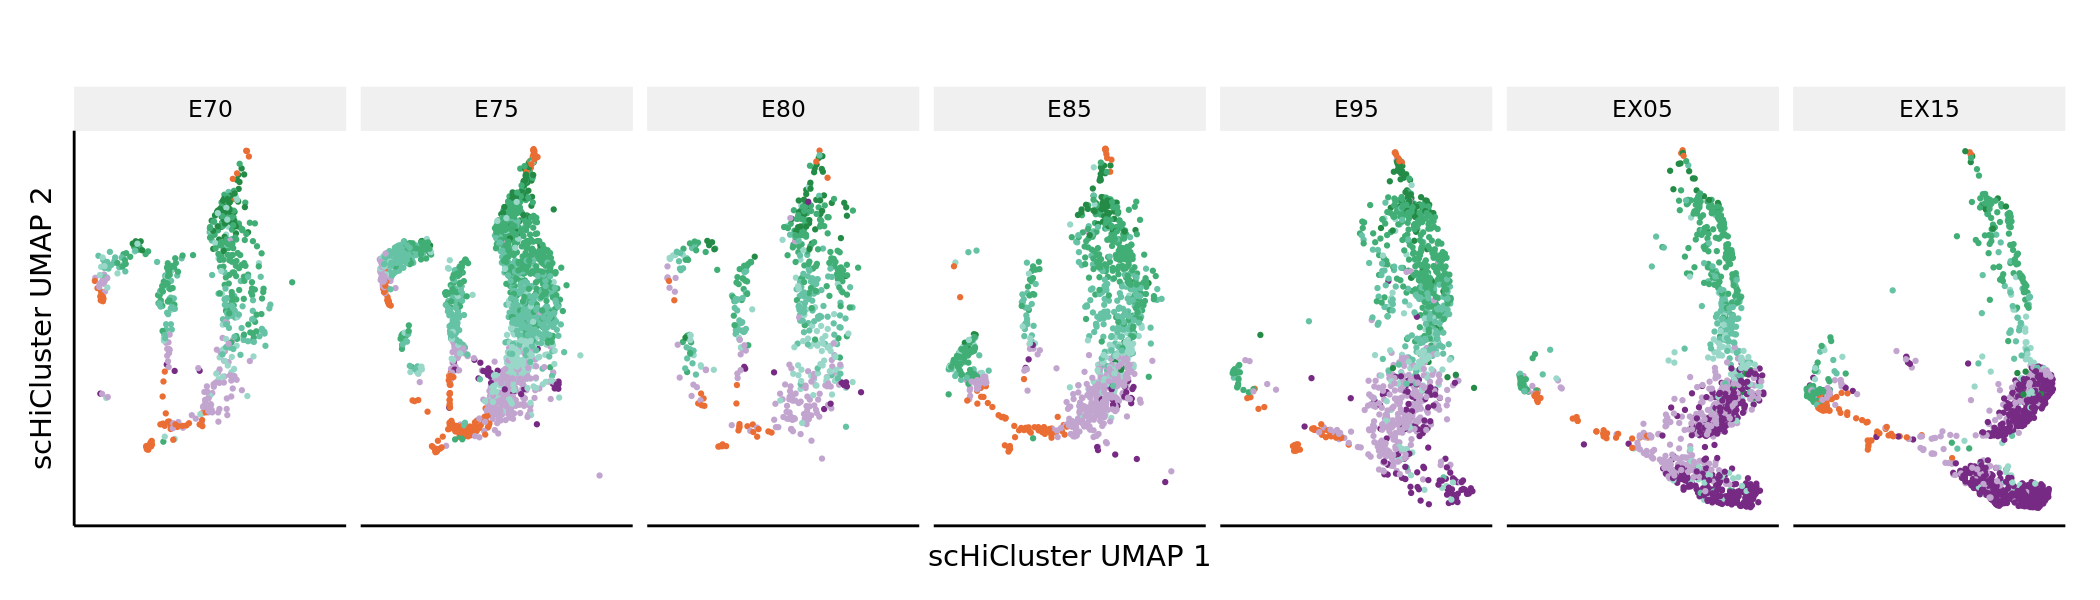

In [11]:
options(repr.plot.width=7, repr.plot.height=2,repr.plot.res=300)
p <- DimPlot(hires,label=F,repel = F,reduction = "schiclusterumap",group.by = "cellcycle_threshold",cols=cellcyclecolors,pt.size=0.05,split.by="stage") + theme_Publication() + 
    ggtitle("")  + theme(legend.position = "right",legend.direction = "vertical") + NoLegend() + 
      scale_x_continuous(breaks = c(-6,-1,4))

p <- p + theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + xlab("scHiCluster UMAP 1") + ylab("scHiCluster UMAP 2")
p
p %>% ggsave(filename = "umap_main_stageHiC_cellcycle.pdf",height = 2, width =8,dpi=300,units ="in")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


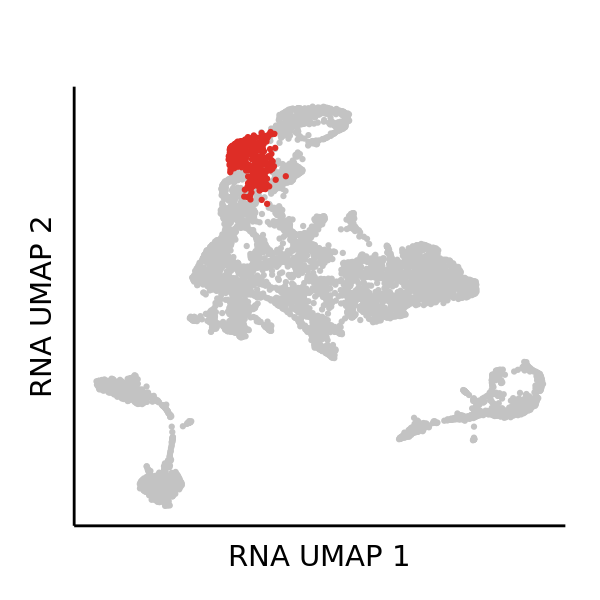

In [22]:
options(repr.plot.width=2, repr.plot.height=2,repr.plot.res=300)
b <- DimPlot(hires,label=F,reduction = "umap",group.by = "celltype",cells.highlight = list(neuralecto = hires[[]] %>% filter(celltype == "radial glias") %>%pull(cellname))
          ,raster=F,pt.size=0.05,  sizes.highlight = 0.05) + theme_Publication() + NoLegend() + ggtitle("")
b <- b + theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + xlab("RNA UMAP 1") + ylab("RNA UMAP 2")
b
b %>% ggsave(filename = "umap_RNA_rg.pdf",height = 2, width =2,dpi=300,units ="in")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


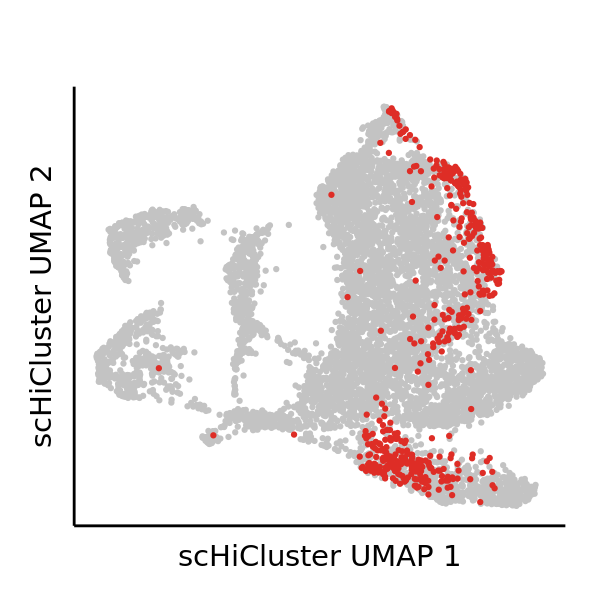

In [23]:
options(repr.plot.width=2, repr.plot.height=2,repr.plot.res=300)
b <- DimPlot(hires,label=F,reduction = "schiclusterumap",group.by = "celltype",cells.highlight = list(neuralecto = hires[[]] %>% filter(celltype == "radial glias") %>%pull(cellname)),
 ,raster=F,pt.size=0.05,  sizes.highlight = 0.05) + theme_Publication() + NoLegend() + ggtitle("")
b <- b + theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + xlab("scHiCluster UMAP 1") + ylab("scHiCluster UMAP 2")
b
b %>% ggsave(filename = "umap_HiC_rg.pdf",height = 2, width =2,dpi=300,units ="in")

In [1]:
hires

ERROR: Error in eval(expr, envir, enclos): object 'hires' not found


In [24]:
source("/shareb/zliu/analysis/hires_gastrulation/CHARMtools/Rlibs/plotFun.R")
source("/shareb/zliu/analysis/hires_gastrulation/CHARMtools/Rlibs/hires_utils.R")
source("/shareb/zliu/analysis/hires_gastrulation/CHARMtools/Rlibs/cellcycle_ana.R")


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [25]:
library(cellAlign)

In [26]:
hires_cc <- subset(hires,subset = cellcycle_threshold %in% c("G1","Early-S","Mid-S","Late-S","G2"))

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from cpg_umap_ to cpgumap_”
Warning message:
“Cannot add objects with duplicate keys (offending key: cpgumap_) setting key to original value 'cpg_umap_'”


In [27]:
registerDoParallel(20)
middle_shift <- foreach(i = seq(1:4000),.combine = "c",.errorhandling = "remove") %dopar% {
     out <- align_cellcycle(hires_cc,'celltype!= "sample1" & stage == "E95"','celltype!= "sample2" & stage == "E95"',sample_number=300)
     out[2][[1]][[1]]
 }
early_shift <- foreach(i = seq(1:4000),.combine = "c",.errorhandling = "remove") %dopar% {
    out <- align_cellcycle(hires_cc,'stage == "E75"','stage == "E95"',sample_number=300)
    out[2][[1]][[1]]
}
late_shift <- foreach(i = seq(1:4000),.combine = "c",.errorhandling = "remove") %dopar% {
    out <- align_cellcycle(hires_cc,'stage == "EX15"','stage == "E95"',sample_number=300)
    out[2][[1]][[1]]
}

a <- middle_shift %>% as.data.frame() %>% mutate(type = "E9.5 vs. E9.5")
b <- early_shift %>% as.data.frame() %>% mutate(type = "E7.5 vs. E9.5")
c <- late_shift %>% as.data.frame() %>% mutate(type = "E11.5 vs. E9.5")
neural_shift <- rbind(a,b,c)
names(neural_shift) <- c("shift","type")

In [28]:
neural_shift %>% mutate(shift = as.numeric(shift)) -> neural_shift

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 6 rows containing missing values (geom_bar).”
Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 6 rows containing missing values (geom_bar).”


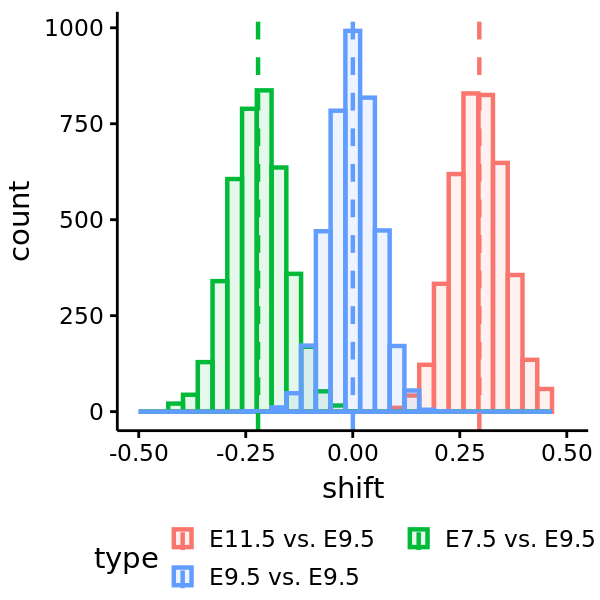

In [29]:
options(repr.plot.width=2,repr.plot.height=2,repr.plot.res=300)
p<-neural_shift %>% gghistogram(x="shift",bins= 30,fill = "type",color= "type",alpha = 0.1,add="mean") + 
    theme_Publication() + scale_x_continuous(limits = c(-0.5,0.5)) + 
    theme(legend.position = "bottom", legend.direction = "horizontal", legend.margin=margin()) + 
    guides(color=guide_legend(nrow=2,byrow=TRUE))
p %>% ggsave(filename = "stage_shift.pdf",height = 2,width = 2,dpi = 300, units = "in") 
p

In [37]:
celltype1 <- 'celltype == "neural ectoderm"'  
celltype2 <- 'celltype == "neural tube"'
celltype3 <- 'celltype == "radial glias"' 

early <- align_cellcycle(hires_cc,celltype1,celltype2,numPts = 30)[3][[1]]
late <- align_cellcycle(hires_cc,celltype2,celltype3,numPts = 30)[3][[1]]

plotData <- rbind(early,late %>% mutate(align = - align)) %>% ungroup() %>% filter(variable != "diff")
plotData$variable <- factor(plotData$variable, levels = rev(c("neural ectoderm","neural tube","radial glias")))

Joining, by = "cellname"
Joining, by = "cellname"
calculate dissimilarity matrix

calculate cost and step matrices

backtracking

Joining, by = "cellname"
Joining, by = "cellname"
Joining, by = "metaNodeRef"
Joining, by = "metaNodeQuery"
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Joining, by = "cellname"
Joining, by = "cellname"
calculate dissimilarity matrix

calculate cost and step matrices

backtracking

Joining, by = "cellname"
Joining, by = "cellname"
Joining, by = "metaNodeRef"
Joining, by = "metaNodeQuery"
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


Warning message:
“Ignoring unknown aesthetics: width”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


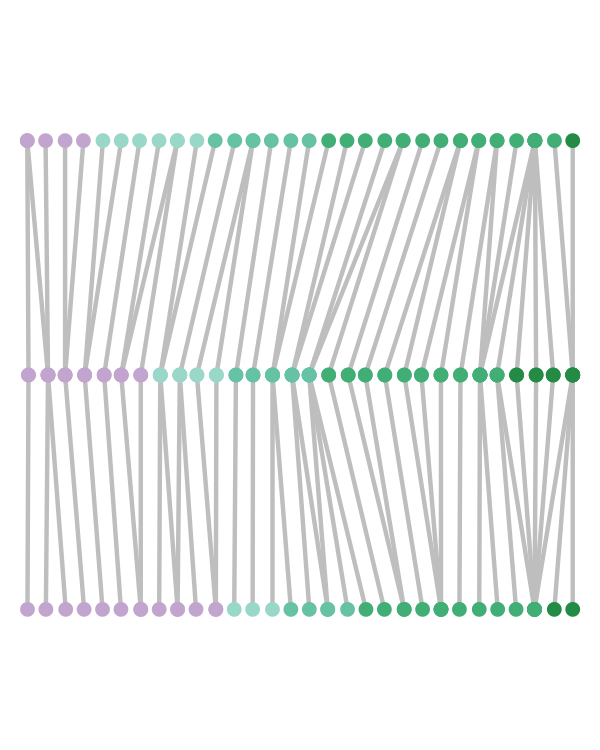

In [86]:
options(repr.plot.width=2,repr.plot.height=2.5,repr.plot.res=300)
alignment_plot <- ggplot(plotData %>% filter(variable != "diff"), aes(x = variable, y = value, group = align)) + 
            geom_line(color = "grey",aes(width = 0.05)) + theme_bw() + geom_point(aes(color = cellcycle),size = 1) + 
            coord_flip() + theme_Publication() + NoLegend() + scale_color_manual(values = cellcyclecolors)+
            xlab("") + ylab("cellcycle")
alignment_plot <- alignment_plot + theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()
            )+ theme_void() + NoLegend() + xlab("") + ylab("")
alignment_plot
alignment_plot%>% ggsave(filename = "align.pdf",height = 2,width = 3,dpi = 300, units = "in") 

In [ ]:
# cellcycle - HiC - RNA clustering comparison 

In [50]:
hires <- FindClusters(hires,graph.name = "sch.nn",future.seed=TRUE,resolution = 1.9)

Warning message:
“The following arguments are not used: future.seed”
Warning message:
“The following arguments are not used: future.seed”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7469
Number of edges: 69733

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7251
Number of communities: 24
Elapsed time: 0 seconds


3 singletons identified. 21 final clusters.



In [53]:
library(circlize)
col_fun = colorRamp2(seq(from = 0,to=1,length.out = 8), c("#ffffcc","#ffeda0","#fed976","#feb24c","#fd8d3c","#fc4e2a","#e31a1c","#b10026"))

In [163]:
# cellcycle - HiC - RNA clustering comparison 
celltypeColors = c(
"mitosis"="#bebebe","blood"="#ff9400",
"ExE endoderm"="#fec44f", "ExE ectoderm"="#cab2d6", 
"epiblast and PS"="#addd8e",
#neural
"neural ectoderm"="#AECBE6","NMP"="#96B9DB","neural tube"="#7EA8D0","notochord"="#6696C6","radial glias"="#4F85BB","oligodendrocytes and progenitors"="#3773B1","early neurons"="#1F62A6","schwann cell precursors"="#08519C",
#mesodermal
"early mesoderm"="#FC9272","ExE mesoderm"="#EF7F64","early mesenchyme"="#E36C57","intermediate mesoderm"="#D6594A", "myocytes"="#CA473C","mix late mesenchyme"="#BD342F",
"endoderm"="#fe9929","epithelial cells"="#fa9fb5"
)

RNA_hic_mat <- hires[[]] %>% select(cellcycle_threshold,celltype,sch.nn_res.1.9) %>% group_by(sch.nn_res.1.9) %>% 
    mutate(cellnum_hictype = n()) %>% group_by(celltype,sch.nn_res.1.9) %>% mutate(RNAnum_in_hic = n(),percent = RNAnum_in_hic/cellnum_hictype)  %>% 
        select(celltype,sch.nn_res.1.9,percent) %>% unique() %>% ungroup() %>% spread(sch.nn_res.1.9,percent) %>% column_to_rownames("celltype")
RNA_hic_mat[is.na(RNA_hic_mat)] <- 0

cellcycle_hic_mat <- hires[[]] %>% select(cellcycle_threshold,celltype,sch.nn_res.1.9) %>% group_by(sch.nn_res.1.9) %>% 
    mutate(cellnum_hictype = n()) %>% group_by(cellcycle_threshold,sch.nn_res.1.9) %>% mutate(cellcycle_thresholdnum_in_hic = n(),percent = cellcycle_thresholdnum_in_hic/cellnum_hictype)  %>% 
        select(cellcycle_threshold,sch.nn_res.1.9,percent) %>% unique() %>% ungroup() %>% spread(sch.nn_res.1.9,percent) %>% column_to_rownames("cellcycle_threshold")
cellcycle_hic_mat[is.na(cellcycle_hic_mat)] <- 0

#order <- cellcycle_hic_mat%>% t() %>% as.data.frame() %>% names()
order <- c("G0","G1","Early-S","Mid-S","Late-S","G2","M")
cellcycle_hic_mat <- cellcycle_hic_mat[order,c("15","2","16","17","8","9","0","3","5","10","7","11","14","12","1","4","13","18","20","6","19")]

annoDF <- cellcyclecolors %>% as.data.frame() %>% rownames_to_column("cellcycle") %>% mutate(temp=cellcycle) %>% column_to_rownames("temp") 
names(annoDF)[2] <- "colorValue"
annoDF$cellcycle <- factor(annoDF$cellcycle ,levels = order)
annoDF <- annoDF %>% arrange(cellcycle)

topAnno <- HeatmapAnnotation(cellcycle = anno_simple(annoDF%>% select(cellcycle),col = cellcyclecolors),
                             gap = unit(c(10), "mm"),show_annotation_name=FALSE)
                  #pch = annoDF %>% pull(cellcycle)),

options(repr.plot.width=7, repr.plot.height=5,repr.plot.res=200)
p <- cellcycle_hic_mat %>% t() %>% Heatmap(col_fun,top_annotation = topAnno,cluster_columns = FALSE,cluster_rows = FALSE, row_dend_reorder = TRUE,column_dend_reorder = TRUE,
               heatmap_legend_param = list(title = "CC cell %"))

order <- names(celltypeColors)
RNA_hic_mat <- RNA_hic_mat[order,c("15","2","16","17","8","9","0","3","5","10","7","11","14","12","1","4","13","18","20","6","19")]
#order <- RNA_hic_mat%>% t() %>% as.data.frame() %>% names()

annoDF <- celltypeColors%>% as.data.frame() %>% rownames_to_column("celltype") %>% mutate(celltype_id = row_number(),temp=celltype) %>% column_to_rownames("temp") 
annoDF$celltype_id <- as.character(annoDF$celltype_id)
names(annoDF)[2] <- "colorValue"
annoDF$celltype <- factor(annoDF$celltype ,levels = order)
annoDF <- annoDF %>% arrange(celltype)

topAnno <- HeatmapAnnotation(celltype = anno_simple(annoDF%>% select(celltype),col = celltypeColors,
                  ),show_annotation_name=FALSE,
                 gap = unit(c(10), "mm"))

q <- RNA_hic_mat%>% t() %>% Heatmap(top_annotation = topAnno,col_fun,column_dend_reorder = TRUE,show_column_names = FALSE,
                                    cluster_columns = FALSE,
               heatmap_legend_param = list(title = "RNA cell %"))#direction = "horizontal"


options(repr.plot.width=7, repr.plot.height=5,repr.plot.res=200)
draw((p+q),heatmap_legend_side = "right")

In [148]:
library(matrixStats)

In [164]:
rev(roworder)

[1] "schwann cell precursors"          "myocytes"                        
 [3] "NMP"                              "endoderm"                        
 [5] "epiblast and PS"                  "early mesenchyme"                
 [7] "ExE mesoderm"                     "epithelial cells"                
 [9] "notochord"                        "early mesoderm"                  
[11] "neural tube"                      "intermediate mesoderm"           
[13] "oligodendrocytes and progenitors" "neural ectoderm"                 
[15] "radial glias"                     "mix late mesenchyme"             
[17] "early neurons"                    "ExE ectoderm"                    
[19] "ExE endoderm"                     "blood"                           
[21] "mitosis"

In [165]:
# colorder <- c("mitosis","blood","ExE endoderm", "ExE ectoderm","early neurons", "mix late mesenchyme",
#         'radial glias','neural ectoderm','oligodendrocytes and progenitors','intermediate mesoderm','neural tube','early mesoderm',
# 'notochord','epithelial cells','ExE mesoderm','early mesenchyme','epiblast and PS','endoderm','NMP','myocytes','schwann cell precursors')

In [170]:
colorder = names(celltypeColors)

In [171]:
annoDF$celltype <- factor(annoDF$celltype,levels= colorder)

In [172]:
annoDF %>% arrange(celltype)-> annoDF

In [175]:
topAnno <- HeatmapAnnotation(celltype = anno_simple(annoDF%>% select(celltype),col = celltypeColors,
                  ),show_annotation_name=FALSE,
                 gap = unit(c(10), "mm"))

In [176]:
q <- t(RNA_hic_mat)[,colorder] %>% Heatmap(top_annotation = topAnno,col_fun,column_dend_reorder = FALSE,show_column_names = F,show_row_names = F,
                                    cluster_columns = FALSE,cluster_rows=FALSE,
               heatmap_legend_param = list(title = "RNA cell %"))#direction = "horizontal"

In [177]:
draw(p+q)

In [178]:
pdf("clustering_compare_main.pdf", width = 4, height = 3,colormodel = "cmyk",fonts = "Helvetica") 
# Code of the plot
draw((p+q),heatmap_legend_side = "right")
# Close the graphics device
dev.off() 

png 
  2